In [199]:
!pip install pandas==2.3.1 numpy==2.2.6 chardet==5.2.0 seaborn==0.13.2 matplotlib==3.10.5 geopandas==1.1.1 scikit-learn==1.7.1
import pandas as pd
import numpy as np
import chardet
import seaborn as sns
import matplotlib
import geopandas as gpd
import sklearn

You should consider upgrading via the 'C:\Users\osmar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [138]:
# from google.colab import drive
# drive.mount('/gdrive')

**EXPLORACIÓN DE LOS DATOS**

In [139]:

rawdata = open("Accidentes de tránsito en carreteras-2020-2021-Sutran.csv", 'rb').read()
result = chardet.detect(rawdata)
char_enc = result['encoding']
print(char_enc)
df = pd.read_csv('Accidentes de tránsito en carreteras-2020-2021-Sutran.csv', encoding=char_enc, sep=';')

ascii


In [140]:
df.shape

(8155, 9)

In [141]:
df.head(10)

,FECHA_CORTE,FECHA_ACC,HORA_ACC,DEPARTAMENTO,CODIGO_VIA,KILOMETRO,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS
0,20211222,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20211222,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20211222,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5
5,20211222,20200101,16:30,ICA,PE-1S,199,CHOQUE,0,1
6,20211222,20200101,16:35,ICA,PE-1S,201,CHOQUE,1,1
7,20211222,20200101,21:45,HUANUCO,PE-3N,226,ATROPELLO,0,1
8,20211222,20200101,23:50,PIURA,PE-1N,232,CHOQUE,0,6
9,20211222,20200101,02:30,AMAZONAS,PE-5N,263,DESPISTE,0,2


In [142]:
df = df[['FECHA_ACC', 'HORA_ACC', 'MODALIDAD_ACC', 'CANT_FALLECIDOS', 'CANT_HERIDOS', 'CODIGO_VIA', 'DEPARTAMENTO']]


In [143]:
df.dtypes

FECHA_ACC           int64
HORA_ACC           object
MODALIDAD_ACC      object
CANT_FALLECIDOS    object
CANT_HERIDOS       object
CODIGO_VIA         object
DEPARTAMENTO       object
dtype: object

In [144]:

df.FECHA_ACC = df.FECHA_ACC.astype('object')

In [145]:

columnsNumeric = ['CANT_FALLECIDOS','CANT_HERIDOS']
columnsString = ['FECHA_ACC', 'HORA_ACC', 'MODALIDAD_ACC','CODIGO_VIA','DEPARTAMENTO']

In [146]:
df[columnsNumeric].describe()


,CANT_FALLECIDOS,CANT_HERIDOS
count,8155,8155
unique,16,37
top,0,0
freq,7199,3452


**PREPARACIÓN DE LOS DATOS**

In [147]:
df[columnsNumeric].isnull().sum()

CANT_FALLECIDOS    0
CANT_HERIDOS       0
dtype: int64

Variables categóricas:

In [148]:
df[columnsString].describe(include='O')

,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CODIGO_VIA,DEPARTAMENTO
count,8155,8155,8155,8155,8155
unique,638,596,6,175,29
top,20210801,07:00,DESPISTE,PE-1N,LIMA
freq,36,126,3829,1494,1558


In [149]:
df[columnsString].nunique()

FECHA_ACC        638
HORA_ACC         596
MODALIDAD_ACC      6
CODIGO_VIA       175
DEPARTAMENTO      29
dtype: int64

In [150]:
print(df.shape)
print(df[columnsString].nunique())

(8155, 7)
FECHA_ACC        638
HORA_ACC         596
MODALIDAD_ACC      6
CODIGO_VIA       175
DEPARTAMENTO      29
dtype: int64


In [151]:

for x in columnsString:
    print(x)
    print(df.groupby(x).size())
    print("\n")

FECHA_ACC
FECHA_ACC
20200101    16
20200102    22
20200103    15
20200104    14
20200105    16
            ..
20210926    15
20210927    23
20210928     9
20210929    14
20210930    17
Length: 638, dtype: int64


HORA_ACC
HORA_ACC
00:00    16
00:03     1
00:05     9
00:10    19
00:12     1
         ..
23:47     1
23:49     1
23:50    29
23:55     9
N.I.     88
Length: 596, dtype: int64


MODALIDAD_ACC
MODALIDAD_ACC
ATROPELLO     361
CHOQUE       3623
DESPISTE     3829
ESPECIAL      186
N.I.           28
VOLCADURA     128
dtype: int64


CODIGO_VIA
CODIGO_VIA
AM-103    1
AM-108    3
AM-518    1
AN-100    2
AN-104    1
         ..
PU-120    1
PU-123    1
PU-953    1
SM-114    1
TU-101    2
Length: 175, dtype: int64


DEPARTAMENTO
DEPARTAMENTO
AMAZONAS          152
ANCASH            602
APURIMAC          202
AREQUIPA          795
AYACUCHO          168
Arequipa            2
CAJAMARCA         350
CALLAO              6
CUSCO             346
Cusco               1
HUANCAVELICA       62
HUANUCO 

In [152]:

df[columnsString].isnull().sum()

FECHA_ACC        0
HORA_ACC         0
MODALIDAD_ACC    0
CODIGO_VIA       0
DEPARTAMENTO     0
dtype: int64

In [153]:

df.isnull().sum()

FECHA_ACC          0
HORA_ACC           0
MODALIDAD_ACC      0
CANT_FALLECIDOS    0
CANT_HERIDOS       0
CODIGO_VIA         0
DEPARTAMENTO       0
dtype: int64

In [154]:
df.describe(include='all')

,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,DEPARTAMENTO
count,8155,8155,8155,8155,8155,8155,8155
unique,638,596,6,16,37,175,29
top,20210801,07:00,DESPISTE,0,0,PE-1N,LIMA
freq,36,126,3829,7199,3452,1494,1558


In [155]:

from sklearn.impute import SimpleImputer

imp_univ_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [156]:
data_impt_cat = df[columnsString]

In [157]:

imp_univ_cat.fit(data_impt_cat)
imputed_data_univ_cat = pd.DataFrame(data=imp_univ_cat.transform(data_impt_cat),
                             columns=data_impt_cat.columns,dtype='object')

In [158]:

df[columnsString] = imputed_data_univ_cat

In [159]:

df.isnull().sum()

FECHA_ACC          0
HORA_ACC           0
MODALIDAD_ACC      0
CANT_FALLECIDOS    0
CANT_HERIDOS       0
CODIGO_VIA         0
DEPARTAMENTO       0
dtype: int64

In [160]:
df.head(10)

,FECHA_ACC,HORA_ACC,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,CODIGO_VIA,DEPARTAMENTO
0,20200101,05:40,DESPISTE,0,0,PE-1S,LIMA
1,20200101,16:30,DESPISTE,0,0,PE-3N,CAJAMARCA
2,20200101,07:45,DESPISTE,0,1,PE-3N,PASCO
3,20200101,18:30,DESPISTE,0,2,PE-08,CAJAMARCA
4,20200101,18:40,DESPISTE,0,5,PE-1N,LIMA
5,20200101,16:30,CHOQUE,0,1,PE-1S,ICA
6,20200101,16:35,CHOQUE,1,1,PE-1S,ICA
7,20200101,21:45,ATROPELLO,0,1,PE-3N,HUANUCO
8,20200101,23:50,CHOQUE,0,6,PE-1N,PIURA
9,20200101,02:30,DESPISTE,0,2,PE-5N,AMAZONAS


In [161]:

df.isnull().sum()

FECHA_ACC          0
HORA_ACC           0
MODALIDAD_ACC      0
CANT_FALLECIDOS    0
CANT_HERIDOS       0
CODIGO_VIA         0
DEPARTAMENTO       0
dtype: int64

In [162]:

df['FECHA_ACC'] = pd.to_datetime(df['FECHA_ACC'], format='%Y%m%d').dt.month

df['HORA_ACC'] = df['HORA_ACC'].replace(['N.I.', 'N.I', 'NI', 'N/A', '', None], np.nan)

df['HORA_ACC'] = pd.to_datetime(df['HORA_ACC'], format='%H:%M', errors='coerce').dt.hour

moda_hora = df['HORA_ACC'].mode()[0] if not df['HORA_ACC'].mode().empty else 0

df['HORA_ACC'] = df['HORA_ACC'].fillna(moda_hora)

df['FECHA_ACC'] = df['FECHA_ACC'].astype(int)

def categorize_time(hour):
    if 6 <= hour < 12:
        return 'MAÑANA'
    elif 12 <= hour < 18:
        return 'TARDE'
    elif 18 <= hour < 24:
        return 'NOCHE'
    else:
        return 'MADRUGADA'




df['HORA_ACC'] = df['HORA_ACC'].apply(categorize_time)

In [163]:

df['CODIGO_VIA'] = df['CODIGO_VIA'].apply(lambda x: 'CARRETERA' if x != 'VIA URBANA' else x)

In [164]:
df.dtypes

FECHA_ACC           int64
HORA_ACC           object
MODALIDAD_ACC      object
CANT_FALLECIDOS    object
CANT_HERIDOS       object
CODIGO_VIA         object
DEPARTAMENTO       object
dtype: object

In [165]:

df.FECHA_ACC = df.FECHA_ACC.astype('object')

In [166]:

Columnsnames = ['NUM_MES', 'MOMENTO_DIA', 'MODALIDAD_ACC', 'CANT_FALLECIDOS',
       'CANT_HERIDOS', 'TIPO_VIA', 'DEPARTAMENTO']
df.columns = Columnsnames

In [167]:

columnsNumeric = ['CANT_FALLECIDOS','CANT_HERIDOS']
columnsString = ['NUM_MES', 'MOMENTO_DIA', 'MODALIDAD_ACC','TIPO_VIA','DEPARTAMENTO']

In [168]:

for x in columnsString:
    print(x)
    print(df.groupby(x).size())
    print("\n")

NUM_MES
NUM_MES
1     961
2     905
3     732
4     494
5     602
6     684
7     787
8     861
9     828
10    387
11    430
12    484
dtype: int64


MOMENTO_DIA
MOMENTO_DIA
MADRUGADA    1227
MAÑANA       2332
NOCHE        2147
TARDE        2449
dtype: int64


MODALIDAD_ACC
MODALIDAD_ACC
ATROPELLO     361
CHOQUE       3623
DESPISTE     3829
ESPECIAL      186
N.I.           28
VOLCADURA     128
dtype: int64


TIPO_VIA
TIPO_VIA
CARRETERA    8155
dtype: int64


DEPARTAMENTO
DEPARTAMENTO
AMAZONAS          152
ANCASH            602
APURIMAC          202
AREQUIPA          795
AYACUCHO          168
Arequipa            2
CAJAMARCA         350
CALLAO              6
CUSCO             346
Cusco               1
HUANCAVELICA       62
HUANUCO           174
ICA               377
JUNIN             715
LA LIBERTAD       329
LAMBAYEQUE        343
LIMA             1558
LORETO             82
MADRE DE DIOS     191
MOQUEGUA          155
N.I.                7
PASCO              77
PIURA             327
PUNO

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\1196907960.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")


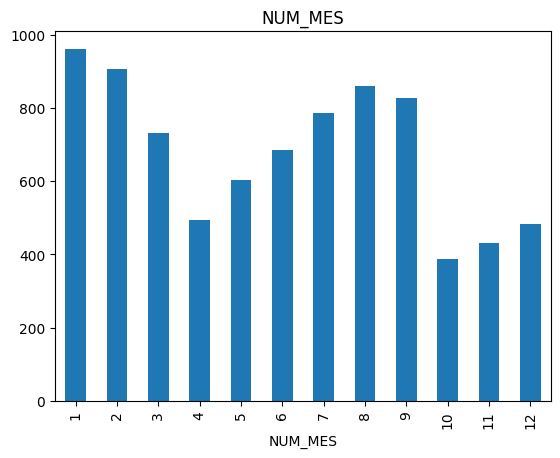

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\1196907960.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")


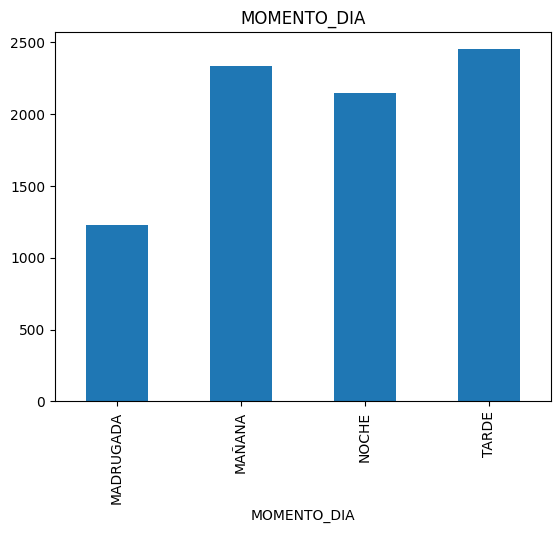

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\1196907960.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")


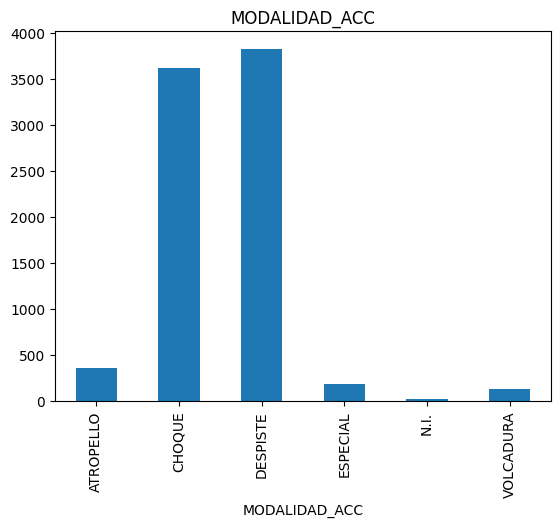

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\1196907960.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")


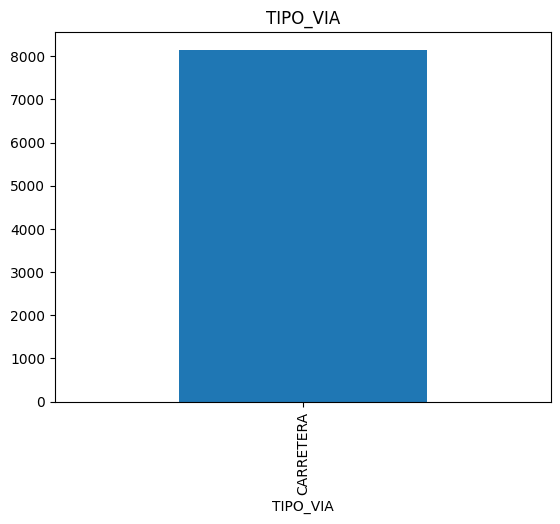

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\1196907960.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")


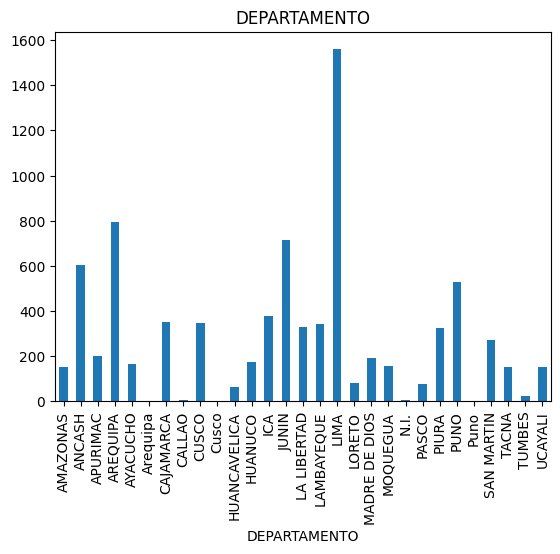

In [169]:

for x in columnsString:
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

In [170]:

# df.to_csv('/gdrive/MyDrive/COLABORATIVO 1/dataSutranPrueba.csv') # Ruta a guardar el archivo generado!

In [171]:
from sklearn.preprocessing import LabelEncoder

for c in columnsString:
    print(str(c))
    le = LabelEncoder()
    le.fit(df[str(c)])
    df[str(c)] = le.transform(df[str(c)])


    print("Etiquetas originales:", le.classes_)
    print("Valores estandarizados:", le.transform(le.classes_))

NUM_MES
Etiquetas originales: [1 2 3 4 5 6 7 8 9 10 11 12]
Valores estandarizados: [ 0  1  2  3  4  5  6  7  8  9 10 11]
MOMENTO_DIA
Etiquetas originales: ['MADRUGADA' 'MAÑANA' 'NOCHE' 'TARDE']
Valores estandarizados: [0 1 2 3]
MODALIDAD_ACC
Etiquetas originales: ['ATROPELLO' 'CHOQUE' 'DESPISTE' 'ESPECIAL' 'N.I.' 'VOLCADURA']
Valores estandarizados: [0 1 2 3 4 5]
TIPO_VIA
Etiquetas originales: ['CARRETERA']
Valores estandarizados: [0]
DEPARTAMENTO
Etiquetas originales: ['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'Arequipa'
 'CAJAMARCA' 'CALLAO' 'CUSCO' 'Cusco' 'HUANCAVELICA' 'HUANUCO' 'ICA'
 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE' 'LIMA' 'LORETO' 'MADRE DE DIOS'
 'MOQUEGUA' 'N.I.' 'PASCO' 'PIURA' 'PUNO' 'Puno' 'SAN MARTIN' 'TACNA'
 'TUMBES' 'UCAYALI']
Valores estandarizados: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


In [172]:

def Cuantiles(lista):
    # Convierte a numérico, ignorando errores
    lista = pd.to_numeric(lista, errors='coerce')
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c), pd.DataFrame(np.percentile(lista.dropna(), c))], axis=1)
    matrix.columns = ["Cuantil", "Valor_Variable"]
    return matrix

In [173]:

Cuantiles(df["CANT_FALLECIDOS"]).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,33.0


In [174]:

df["CANT_FALLECIDOS"] = pd.to_numeric(df["CANT_FALLECIDOS"], errors='coerce')

cuantil_1 = np.percentile(df["CANT_FALLECIDOS"].dropna(), 1)
cuantil_99 = np.percentile(df["CANT_FALLECIDOS"].dropna(), 99)

In [175]:

df.loc[df["CANT_FALLECIDOS"]<cuantil_1,"CANT_FALLECIDOS"] = cuantil_1
df.loc[df["CANT_FALLECIDOS"]>cuantil_99,"CANT_FALLECIDOS"] = cuantil_99

In [176]:
Cuantiles(df["CANT_FALLECIDOS"]).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0


In [177]:

Cuantiles(df["CANT_HERIDOS"]).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,6.0,10.0,71.0


In [178]:
df["CANT_HERIDOS"] = pd.to_numeric(df["CANT_HERIDOS"], errors='coerce')

cuantil_1h = np.percentile(df["CANT_HERIDOS"].dropna(), 1)
cuantil_97 = np.percentile(df["CANT_HERIDOS"].dropna(), 97.5)

In [179]:
cuantil_97

np.float64(6.0)

In [180]:

df.loc[df["CANT_HERIDOS"]<cuantil_1h,"CANT_HERIDOS"] = cuantil_1h
df.loc[df["CANT_HERIDOS"]>cuantil_97,"CANT_HERIDOS"] = cuantil_97

In [181]:
Cuantiles(df["CANT_HERIDOS"]).transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,6.0,6.0,6.0


In [182]:

df['PONDERADO_GRAVEDAD'] = df['CANT_FALLECIDOS'] * 5 + df['CANT_HERIDOS'] * 1


In [183]:

Cuantiles(df["PONDERADO_GRAVEDAD"]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,5.0,6.0,6.0,10.0,12.0,16.0


In [184]:

percentiles = df["PONDERADO_GRAVEDAD"].quantile([0.0, 0.80, 0.95, 1.0])


def clasificar_gravedad(valor):
    if valor <= percentiles[0.80]:
        return 'LEVE'
    elif valor <= percentiles[0.95]:
        return 'MODERADO'
    else:
        return 'GRAVE'


df['GRAVEDAD_ACC'] = df['PONDERADO_GRAVEDAD'].apply(clasificar_gravedad)


**MODELADO DE DATOS**

In [185]:
columnas = ["NUM_MES",	"MOMENTO_DIA",	"MODALIDAD_ACC",	"CANT_FALLECIDOS",	"CANT_HERIDOS", "TIPO_VIA",	"DEPARTAMENTO",	"PONDERADO_GRAVEDAD",	"GRAVEDAD_ACC"]

df_modelado = df[columnas]

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_modelado.drop('GRAVEDAD_ACC',axis=1),
                                                    df_modelado.GRAVEDAD_ACC,
                                                    test_size=0.20,
                                                    stratify=df_modelado.GRAVEDAD_ACC,
                                                    random_state=80)

In [187]:
def probabilidad_a_priori(y_train):

    priors = y_train.value_counts(normalize=True).to_dict()


    return priors

priors = probabilidad_a_priori(y_train)


print(priors)

{'LEVE': 0.8171367259350092, 'MODERADO': 0.13841201716738197, 'GRAVE': 0.04445125689760883}


In [188]:
def calculate_likelihoods(X_train, y_train):

    likelihoods = {}


    for column in X_train.columns:

        likelihoods[column] = {}


        for value in X_train[column].unique():

            likelihoods[column][value] = {}


            for outcome in y_train.unique():

                likelihoods[column][value][outcome] = (
                    ((X_train[column] == value) & (y_train == outcome)).sum() + 1) / (y_train[y_train == outcome].shape[0] + X_train[column].nunique())


    return likelihoods


likelihoods = calculate_likelihoods(X_train, y_train)

In [189]:
def predict(X_test, priors, likelihoods):
    predictions = []
    for i in range(X_test.shape[0]):
        posteriors = {}
        for outcome in priors:
            prior = np.log(priors[outcome])
            posterior = prior
            for column in X_test.columns:
                value = X_test.iloc[i][column]
                if value in likelihoods[column]:
                    if outcome in likelihoods[column][value]:
                        posterior += np.log(likelihoods[column][value][outcome])
            posteriors[outcome] = posterior
        predictions.append(max(posteriors, key=posteriors.get))
    return predictions

predictions = predict(X_test, priors, likelihoods)

In [190]:

from sklearn.metrics import accuracy_score
# Bayes
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9993868792152054


## **Visualización de datos**

<Axes: >

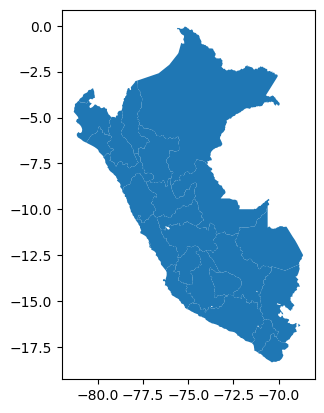

In [191]:

df_original = pd.read_csv('Accidentes de tránsito en carreteras-2020-2021-Sutran.csv', encoding=char_enc, sep=';')
df_visualizacion = df.copy()
df_visualizacion['DEPARTAMENTO'] = df_original['DEPARTAMENTO']

mapa = gpd.read_file('mapa.geojson')
mapa.plot()

In [192]:
df_visualizacion.head()

,NUM_MES,MOMENTO_DIA,MODALIDAD_ACC,CANT_FALLECIDOS,CANT_HERIDOS,TIPO_VIA,DEPARTAMENTO,PONDERADO_GRAVEDAD,GRAVEDAD_ACC
0,0,0,2,0.0,0.0,0,LIMA,0.0,LEVE
1,0,3,2,0.0,0.0,0,CAJAMARCA,0.0,LEVE
2,0,1,2,0.0,1.0,0,PASCO,1.0,LEVE
3,0,2,2,0.0,2.0,0,CAJAMARCA,2.0,LEVE
4,0,2,2,0.0,5.0,0,LIMA,5.0,MODERADO


DEPARTAMENTO
LIMA             1558
AREQUIPA          795
JUNIN             715
ANCASH            602
PUNO              529
ICA               377
CAJAMARCA         350
CUSCO             346
LAMBAYEQUE        343
LA LIBERTAD       329
PIURA             327
SAN MARTIN        274
APURIMAC          202
MADRE DE DIOS     191
HUANUCO           174
AYACUCHO          168
MOQUEGUA          155
UCAYALI           154
AMAZONAS          152
TACNA             151
LORETO             82
PASCO              77
HUANCAVELICA       62
TUMBES             25
N.I.                7
CALLAO              6
Arequipa            2
Cusco               1
Puno                1
Name: count, dtype: int64


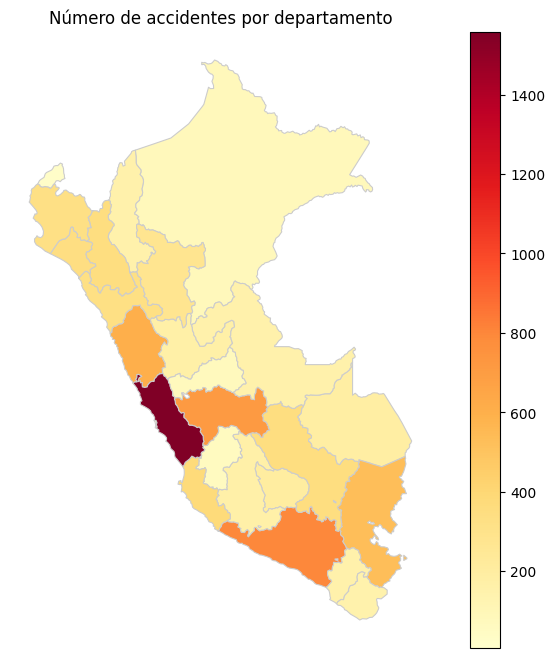

In [193]:

mapa = gpd.read_file('mapa.geojson')
accidentes_por_departamento = df_visualizacion['DEPARTAMENTO'].value_counts()
print(accidentes_por_departamento)

mapa = mapa.set_index('NOMBDEP').join(accidentes_por_departamento.rename('accidentes'))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapa.plot(column='accidentes', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.axis('off')
ax.set_title('Número de accidentes por departamento')

plt.show()

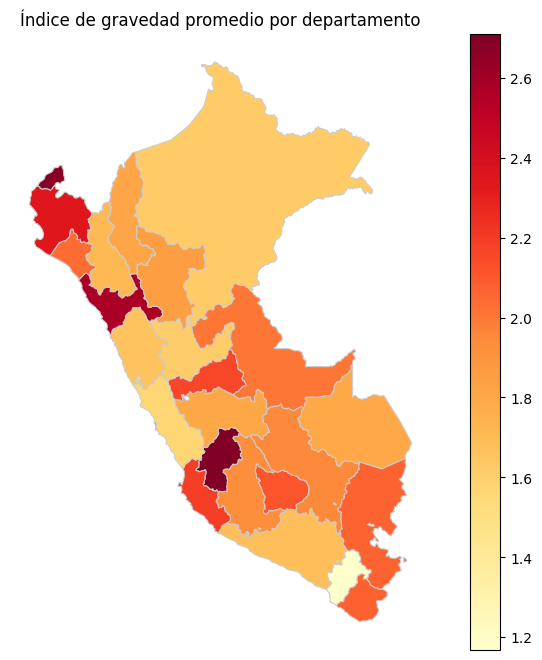

In [194]:

mapa = gpd.read_file('mapa.geojson')
gravedad_promedio = df_visualizacion.groupby('DEPARTAMENTO')['PONDERADO_GRAVEDAD'].mean()
mapa = mapa.reset_index()

mapa = mapa.set_index('NOMBDEP').join(gravedad_promedio.rename('gravedad_promedio'))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapa.plot(column='gravedad_promedio', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.axis('off')
ax.set_title('Índice de gravedad promedio por departamento')

plt.show()

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\3206922265.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y='NUM_ACCIDENTES', data=df_plot, palette=list(bar_colors), ax=ax)
C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\3206922265.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


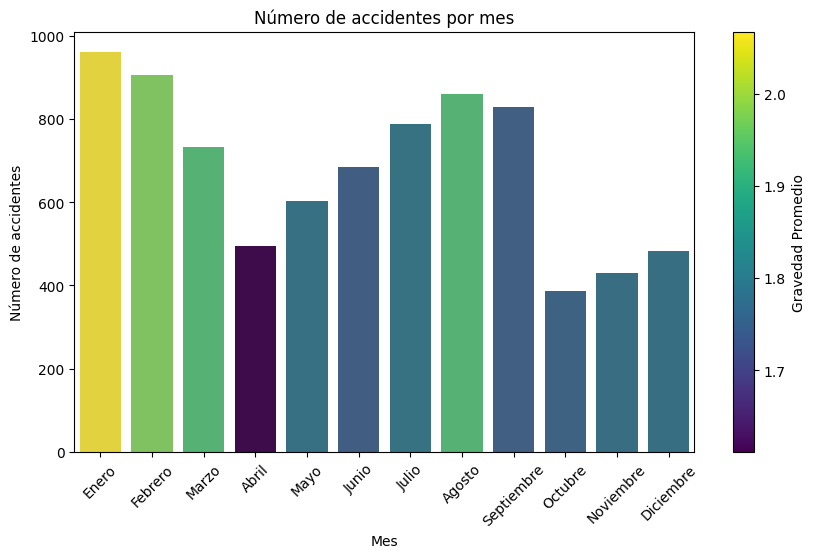

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_visualizacion.copy()

gravedad_promedio = df_plot.groupby('DEPARTAMENTO')['PONDERADO_GRAVEDAD'].mean()

promedio_gravedad_por_mes = df_plot.groupby('NUM_MES')['PONDERADO_GRAVEDAD'].mean().reset_index()
promedio_gravedad_por_mes.columns = ['NUM_MES', 'GRAVEDAD_PROMEDIO']

accidentes_por_mes = df_plot.groupby('NUM_MES').size().reset_index(name='NUM_ACCIDENTES')

df_plot = accidentes_por_mes.merge(promedio_gravedad_por_mes, on='NUM_MES')
df_plot = df_plot.sort_values('NUM_MES')

cmap = sns.color_palette("viridis", as_cmap=True)
norm = plt.Normalize(df_plot['GRAVEDAD_PROMEDIO'].min(), df_plot['GRAVEDAD_PROMEDIO'].max())
bar_colors = cmap(norm(df_plot['GRAVEDAD_PROMEDIO']))

meses = {
    0: 'Enero', 1: 'Febrero', 2: 'Marzo', 3: 'Abril', 4: 'Mayo', 5: 'Junio',
    6: 'Julio', 7: 'Agosto', 8: 'Septiembre', 9: 'Octubre', 10: 'Noviembre', 11: 'Diciembre'
}

df_plot.set_index('NUM_MES', inplace=True)
df_plot.rename(index=meses, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df_plot.index, y='NUM_ACCIDENTES', data=df_plot, palette=list(bar_colors), ax=ax)

ax.set_title('Número de accidentes por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de accidentes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.subplots_adjust(bottom=0.2, top=0.9)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Gravedad Promedio')

plt.show()

C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\2152504012.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y='NUM_ACCIDENTES', data=df_plot, palette=list(bar_colors), ax=ax)
C:\Users\osmar\AppData\Local\Temp\ipykernel_104408\2152504012.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


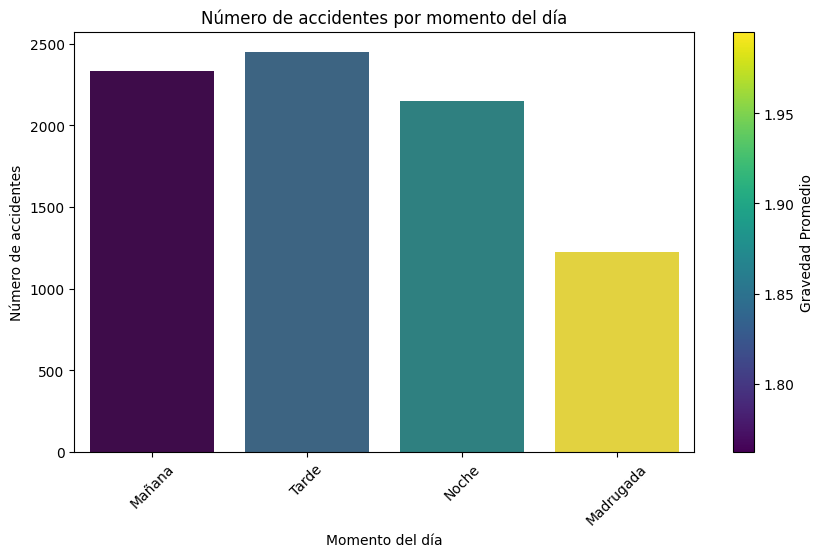

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_visualizacion.copy()

promedio_gravedad_por_momento = df_plot.groupby('MOMENTO_DIA')['PONDERADO_GRAVEDAD'].mean().reset_index()
promedio_gravedad_por_momento.columns = ['MOMENTO_DIA', 'GRAVEDAD_PROMEDIO']

accidentes_por_momento = df_plot.groupby('MOMENTO_DIA').size().reset_index(name='NUM_ACCIDENTES')

df_plot = accidentes_por_momento.merge(promedio_gravedad_por_momento, on='MOMENTO_DIA')

momentos_dia = {
    0: 'Madrugada', 1: 'Mañana', 2: 'Noche', 3: 'Tarde'
}

df_plot.set_index('MOMENTO_DIA', inplace=True)
df_plot.rename(index=momentos_dia, inplace=True)
df_plot = df_plot.reindex(['Mañana', 'Tarde', 'Noche', 'Madrugada'])

cmap = sns.color_palette("viridis", as_cmap=True)
norm = plt.Normalize(df_plot['GRAVEDAD_PROMEDIO'].min(), df_plot['GRAVEDAD_PROMEDIO'].max())
bar_colors = cmap(norm(df_plot['GRAVEDAD_PROMEDIO']))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df_plot.index, y='NUM_ACCIDENTES', data=df_plot, palette=list(bar_colors), ax=ax)

ax.set_title('Número de accidentes por momento del día')
ax.set_xlabel('Momento del día')
ax.set_ylabel('Número de accidentes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.subplots_adjust(bottom=0.2, top=0.9)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Gravedad Promedio')

plt.show()